THERE ARE 2 WAY TO IMPLEMENT LIBRARY IN KERAS. i) Sequentially
ii) Functionally
[https://youtu.be/KNr7hbhBdiI?si=uNnIa2h-CUTi8GOO]

Amra ekhne ANN diye 2 ta non linear data set ke
classificar

In [ ]:
import numpy as np
np.random.seed(0)
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
#This code is for jupiter.  Without this magic command, the plot might open in a separate window instead of appearing in the notebook.
%config InlineBackend.figure_format = 'retina'
# This makes the plots look sharper and more detailed, especially on displays with high pixel density (like some laptop screens and tablets).
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [ ]:
X,y =datasets.make_moons(n_samples=1000,noise=0.1,random_state=0)
y.shape , X.shape

((1000,), (1000, 2))

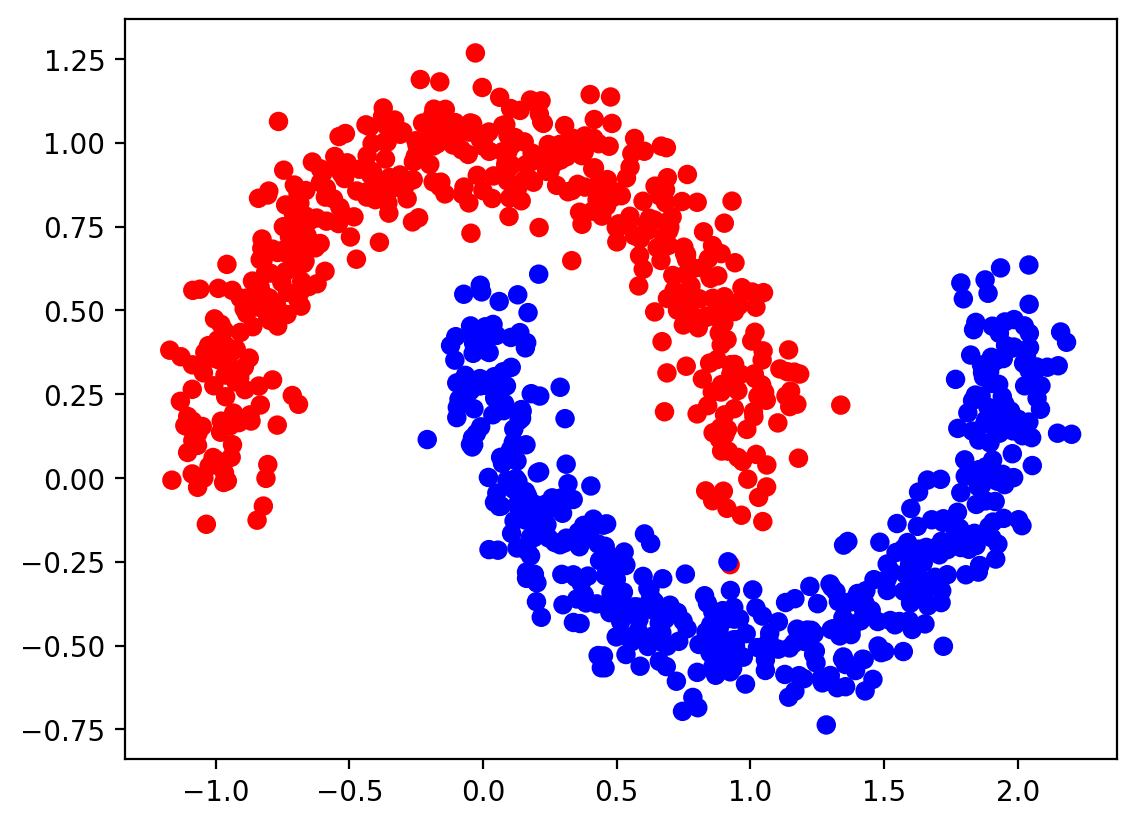

In [ ]:
#visualization
colors =['blue' if label==1 else 'red' for label in y]
plt.scatter(X[:,0],X[:,1], color=colors)

Here we make a Artificial Neural Network, Which contains input layer , hidden layer , output layer. Here we have 2 class so 2 input, we take approximately 4-5 hidden layer 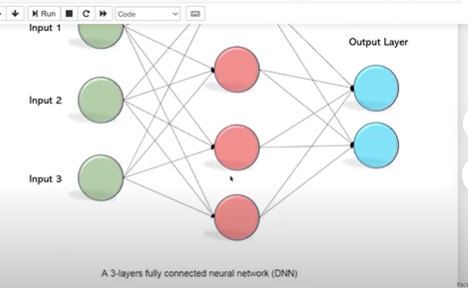

In [ ]:
#import "Sequential" from keras.models
from keras.models import Sequential
#import "Dense" from keras.layers
from keras.layers import Dense
#Initialize the constructor
model=Sequential()
#Add an input layer = model.add(Dense(hidden layer , activation='relu', input_shape=(inputfeature,)))
model.add(Dense(5, activation='relu', input_shape=(2,)))
#Add hidden layer
model.add(Dense(5,activation='relu'))
#output layer model.add(Dense(output hy zero na hy 1 in this data,activation='sigmoid(binary)/Softmax(multi)'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

Amdr fully connected neural network create kora sesh. Now we need to optimizer

dataset choto tai SGD nisi

In [ ]:
sgd= SGD(learning_rate=0.1)

choose a loss function and compile the model

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="sgd", metrics=['accuracy'])

fitting the model

In [ ]:
history=model.fit(X[:500],y[:500], verbose=1, epochs=4000, shuffle=True)
#verbose =1 dile every epoc e accruacy bole dibe


Streaming output truncated to the last 5000 lines.
Epoch 1501/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0073 
Epoch 1502/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0119  
Epoch 1503/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0084  
Epoch 1504/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0141  
Epoch 1505/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0101 
Epoch 1506/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0105 
Epoch 1507/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9975 - loss: 0.0112  
Epoch 1508/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0100 
Epoch 1509/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0136 
Epoch 1510/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0150 
Epoch 1511/4000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s

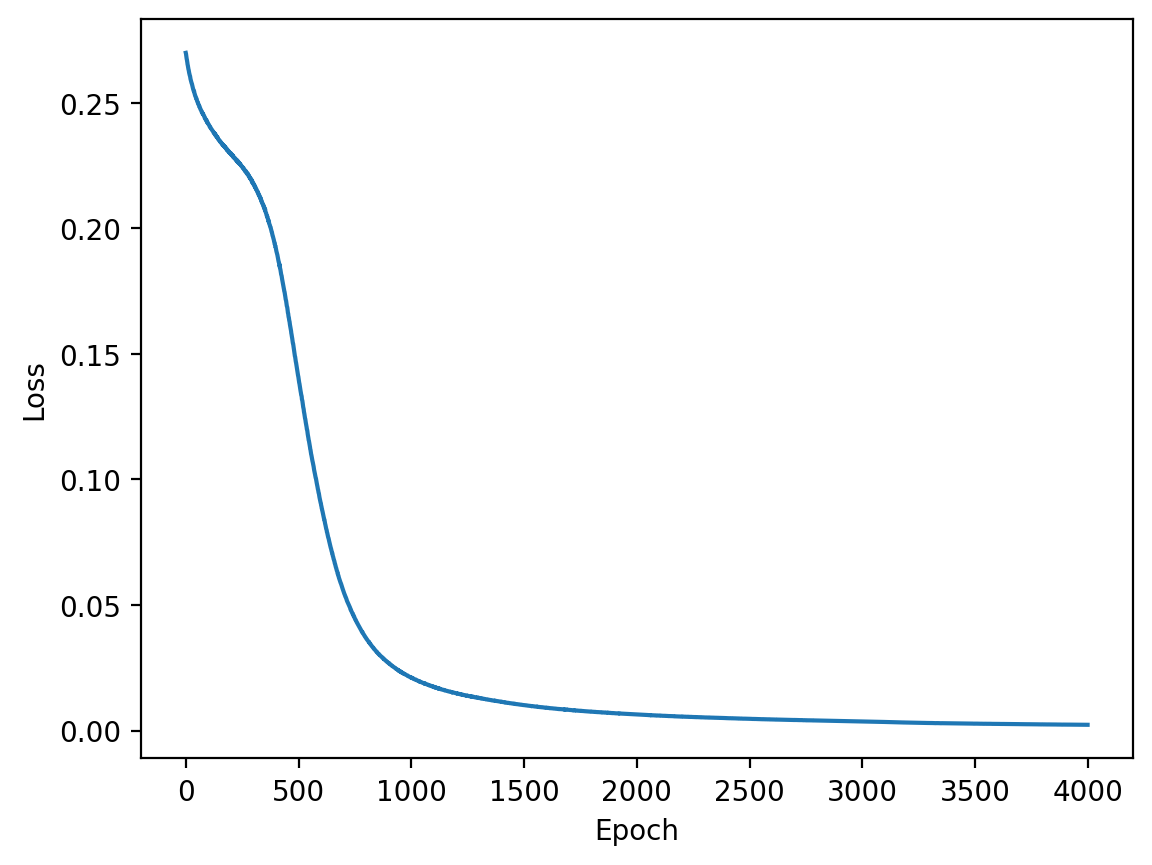

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


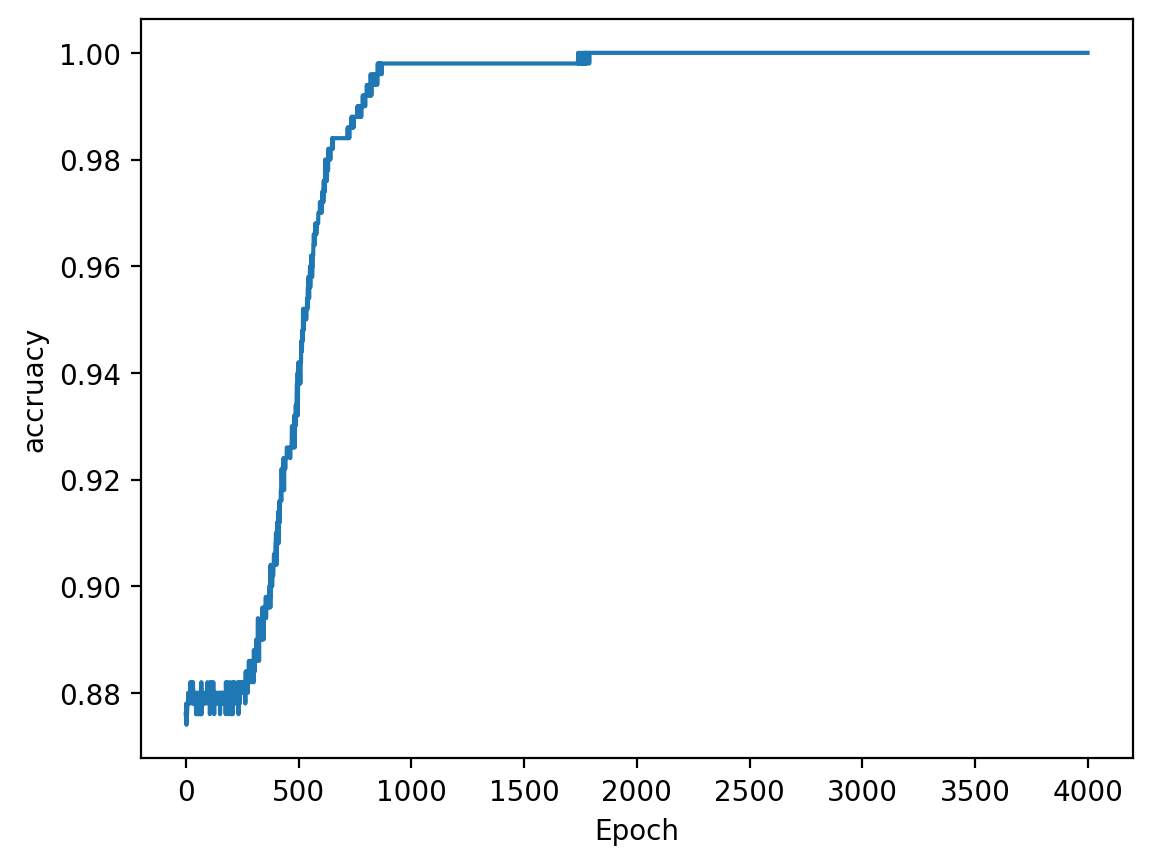

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accruacy')
plt.show()


now we seperate the 2 class

In [ ]:
def plot_decision_boundary(X,y,model,step=1000 , cmap="paired"):
  """ function to plot the decision boundary and data points of a model.
  Data points are colored based on their actual label"""
  cmap= plt.get_cmap(cmap)
  #define region of interest
  x_min, x_max= X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max= X[:,1].min() - 0.1, X[:,1].max() + 0.1
  step=1000
  x_span= np.linspace(x_min,x_max,step)
  y_span= np.linspace(y_min,y_max,step)
  xx,yy= np.meshgrid(x_span,y_span)
  #make prediction across region of interest
  labels= model.predict(np.c_[xx.ravel(),yy.ravel()])
  #plot decision boundary in region of interest
  z= labels.reshape(xx.shape)
  fig,ax=plt.subplots()
  ax.contourf(xx,yy,z,cmap=cmap,alpha=0.5)
#get predicted labels on training data and plot
  train_labels= model.predict(X)
  ax.scatter(X[:,0],X[:,1],c=y,cmap=cmap, lw=0)
  return fig, ax

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

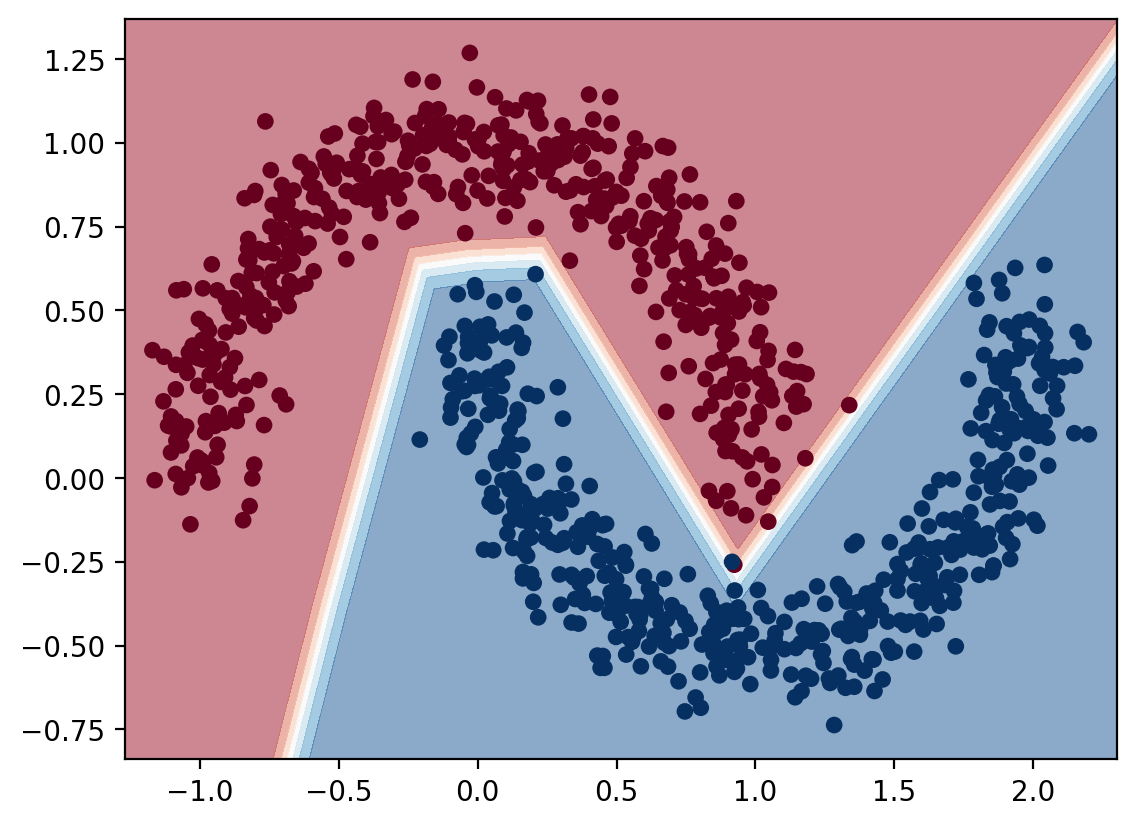

In [ ]:
plot_decision_boundary(X,y,model,cmap="RdBu")